<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#data" data-toc-modified-id="data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>data</a></span><ul class="toc-item"><li><span><a href="#get_sim_data" data-toc-modified-id="get_sim_data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>get_sim_data</a></span></li><li><span><a href="#fill-y" data-toc-modified-id="fill-y-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>fill y</a></span></li><li><span><a href="#fill-x" data-toc-modified-id="fill-x-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>fill x</a></span></li><li><span><a href="#Gultekin19" data-toc-modified-id="Gultekin19-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Gultekin19</a></span></li><li><span><a href="#Xie-2017" data-toc-modified-id="Xie-2017-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Xie 2017</a></span></li><li><span><a href="#Richard-M.-Plotkin2012" data-toc-modified-id="Richard-M.-Plotkin2012-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Richard M. Plotkin2012</a></span></li><li><span><a href="#plot_radio_xray" data-toc-modified-id="plot_radio_xray-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>plot_radio_xray</a></span></li><li><span><a href="#Merloni03" data-toc-modified-id="Merloni03-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Merloni03</a></span></li><li><span><a href="#linear-plot-with-errorbar" data-toc-modified-id="linear-plot-with-errorbar-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>linear plot with errorbar</a></span></li><li><span><a href="#Iterative-fitting-using-sigma-clipping" data-toc-modified-id="Iterative-fitting-using-sigma-clipping-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span><a href="https://docs.astropy.org/en/stable/modeling/example-fitting-line.html#fit-using-uncertainties" target="_blank">Iterative fitting using sigma clipping</a></a></span></li><li><span><a href="#emcee" data-toc-modified-id="emcee-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span><a href="https://emcee.readthedocs.io/en/stable/tutorials/line/" target="_blank">emcee</a></a></span></li></ul></li></ul></div>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from collections import OrderedDict
import matplotlib as mpl

%matplotlib inline

In [3]:
cat ngc7213-rx-Bell2011-fig7_data.txt

cat: ngc7213-rx-Bell2011-fig7_data.txt: No such file or directory


# data

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm
import matplotlib.dates as mdates
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
import matplotlib.cm as cm
import matplotlib.colors as colors
from collections import OrderedDict


# Import required packages
import numpy as np
import pandas as pd
import plotly_express as px
import datetime

from scipy.stats import spearmanr#
from scipy.stats.stats import pearsonr
from astropy import constants
from astropy import units as u
from astropy import units
from datetime import timedelta, datetime
from astropy.time import Time
from astropy.io import ascii




%matplotlib inline
%config InlineBackend.figure_format='svg'
colors_cm_10 = cm.get_cmap('tab10', 10)
colors_4 = cm.get_cmap('tab10', 4)

import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]


# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [3]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy import constants as c
import astropy

from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)
#cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
#cosmo=FlatLambdaCDM(H0=70, Om0=0.27)
D_cm_cosmo=cosmo.luminosity_distance(z=0.042436).to(u.cm)
D_cm=176*u.Mpc.to(u.cm)*u.cm
BH_mass=10**7.84*u.solMass
Ledd=1.26*10**38*BH_mass/u.solMass
#Cosmology-Corrected Quantities [Ho =  73.00 km/sec/Mpc, Ωmatter =   0.27, Ωvacuum =   0.73]




In [7]:
mjdref=59000
mdates.date2num(convert_xaxis_time(59000))-mjdref

678576.0

In [4]:
def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()



def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y

def date2mjd(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - 678576
    return y

def mjd2date(x):
    y= x + 678576
    return y



def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate



In [8]:
radioMrk1018=pd.read_csv('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data_v20201026/Mrk1018radiolc_rescale.csv')

In [9]:
radioMrk1018.columns

Index(['Unnamed: 0', 'Datestart', 'Datestop', 'project', 'project_sure',
       'band', 'frequency', 'f_GHz', 'GHz_label', 'peak(mJy/beam)', 'alpha',
       'Fint(mJy)', 'err', 'rms', 'rescale_alpha', 'rescale_alpha_err',
       'rescale_5GHz', 'rms_efficiency', 'unit', 'proposal', 'paper', 'Note',
       'mjd_start', 'mjd_stop', 'meanmjd', 'mjderr', 'Ferr', 'C_alpha',
       'scaled_flux', 'scaled_rms'],
      dtype='object')

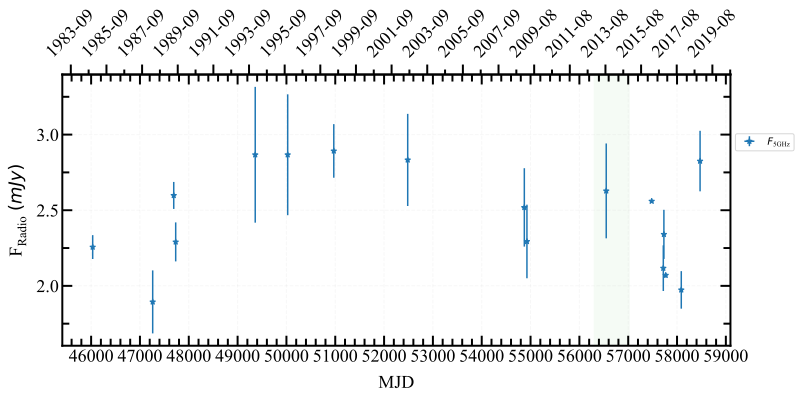

In [12]:
# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(12, 5))
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(1,1,1)

# Hide the top and right spines of the axis
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

# Add the x and y-axis labels


secax1 = ax.secondary_xaxis('top', functions=(mjd2date,date2mjd))
secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
secax1.xaxis.set_major_locator(mdates.DayLocator(interval=365*2))
secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=365))
secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.8),ncol=1,fontsize=10,loc='right')    
ax.axvspan(56293,57033, facecolor='#2ca02c', alpha=0.05)

    

# Edit the major and minor tick locations

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(200))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
# Edit the major and minor ticks of the x and y axes

secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=45,)
secax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(365*2))
secax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(365))

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.errorbar(radioMrk1018['meanmjd'],radioMrk1018['scaled_flux'],xerr=radioMrk1018['mjderr'],yerr=radioMrk1018['scaled_rms'],fmt='o',label=r'$F_\mathregular{5GHz}$',marker='*')

ax.set_xlabel(r'$\mathregular{MJD}$', labelpad=10)
ax.set_ylabel(r'$\mathregular{F_{Radio}}$ $(mJy)$', labelpad=10)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.8),ncol=1,fontsize=10,loc='upper left')    


#fig.tight_layout()
plt.subplots_adjust(hspace = 0.0)
ax.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)

#plt.savefig('/Users/brettlv/Downloads/Mrk1018/subplots-radio-second.png', dpi=300, transparent=False, bbox_inches='tight')
# Show figure
plt.show()

In [10]:
xrayMrk1018=pd.read_excel('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data_v20201026/Mrk1018_Xraydata_append.xlsx')

In [11]:
xrayMrk1018

,Unnamed: 0,mjd,obsid,ins,chi,gamma,gerr,flux,ferr
0,0,53385.000000,201090201,X,0.850000,1.680000,0.110000,10.400000,0.500000
1,1,53587.342373,35166001,S,0.775361,1.926321,0.104547,11.527229,0.699233
2,2,54271.310417,30955001,S,1.010105,1.887729,0.086088,9.386542,0.446761
3,3,54273.837373,30955002,S,1.067653,1.910319,0.080133,8.544443,0.399975
4,4,54275.713206,30955003,S,1.023157,1.961493,0.075008,8.375407,0.346939
5,5,54628.162512,35776001,S,1.190698,1.749137,0.068718,9.977361,0.395566
6,6,54685.000000,554920301,X,1.200000,1.790000,0.030000,11.500000,0.200000
7,7,55015.000000,704044010,Su,1.190000,2.000000,0.030000,10.000000,0.500000
8,8,55527.000000,12868,C,1.200000,1.680000,0.040000,9.200000,0.200000
9,9,56352.679850,49654001,S,1.419720,1.815415,0.378139,2.589211,0.552036


In [150]:
radioMrk1018

,Unnamed: 0,Datestart,Datestop,project,mean epoch year,mean(mjd),terr(mjd),band,frequency,f_GHz,...,paper,Unnamed: 20,mjd_start,mjd_stop,meanmjd,mjderr,Ferr,C_alpha,scaled_flux,scaled_rms
0,3,1984-11-28,1984-11-28,AU0020,NaN,NaN,NaN,C,4.86,4.8GHz,...,NaN,NaN,46032.0,46032.0,46032.0,0.0,0.139679,-0.00,2.290000,0.080264
1,4,1988-04-10,1988-04-10,AB0476,NaN,NaN,NaN,C,4.86,4.8GHz,...,NaN,NaN,47261.0,47261.0,47261.0,0.0,0.230695,-0.00,1.910000,0.210070
2,5,1989-06-15,1989-06-15,AB0540A,NaN,NaN,NaN,C,4.86,4.8GHz,...,NaN,NaN,47692.0,47692.0,47692.0,0.0,0.158937,-0.00,2.620000,0.090307
3,6,1989-07-25,1989-07-25,AB0540B,NaN,NaN,NaN,C,4.86,4.8GHz,...,NaN,NaN,47732.0,47732.0,47732.0,0.0,0.173897,-0.00,2.310000,0.130165
4,8,1993-03-01,1997-05-26,AB0628,NaN,NaN,NaN,L,1.40,1.4GHz,...,1998AJ....115.1693C,Condon+1998,49047.0,50594.0,49820.5,773.5,0.451774,0.30,2.866795,0.455764
5,9,1993-06-03,1999-04-30,AB0308,NaN,NaN,NaN,L,1.40,1.4GHz,...,2002AJ....124..675C,Condon+2002,49141.0,51298.0,50219.5,1078.5,0.542310,0.30,2.866795,0.499652
6,10,1993-03-01,1997-05-26,AB0628,NaN,NaN,NaN,L,1.40,1.4GHz,...,1997ApJ…475..479W,White+1999,49047.0,50594.0,49820.5,773.5,0.252571,0.30,2.832667,0.373745
7,11,1998-06-06,1998-06-06,AB0878,NaN,NaN,NaN,X,8.46,8.4GHz,...,NaN,NaN,50970.0,50970.0,50970.0,0.0,0.165385,0.30,2.892125,0.199308
8,12,2001-02-28,2002-09-08,AB0950,NaN,NaN,NaN,L,1.40,1.4GHz,...,2003yCat.8071....0B,Becker+2003,51968.0,52525.0,52246.5,278.5,0.252571,0.30,2.832667,0.373745
9,16,2013-09-07,2013-09-23,13B-272,NaN,NaN,NaN,L,1.40,1.4GHz,...,2016MNRAS.460.4433H,Heywood+2016,56542.0,56558.0,56550.0,8.0,0.307663,0.30,2.627896,0.372480


In [13]:
radioMrk1018_match=radioMrk1018[['meanmjd','scaled_flux','scaled_rms']]
xrayMrk1018_match=xrayMrk1018[['mjd','flux','ferr']]

## get_sim_data

In [210]:
49361-48999

362

In [203]:
radioMrk1018_match

,meanmjd,scaled_flux,scaled_rms
0,46032.0,2.270572,0.079583
1,47261.0,1.893796,0.208288
2,47692.0,2.597773,0.089541
3,47732.0,2.290403,0.129061
4,49361.0,2.866795,0.499652
5,50026.0,2.866795,0.455764
6,50970.0,2.892125,0.199308
7,52484.0,2.832667,0.373745
8,54872.5,2.518685,0.322810
9,54926.0,2.293436,0.299976


In [206]:
53385-52484.0

901.0

In [14]:
def get_sim_radio_xray_data(radioMrk1018_match,xrayMrk1018_match):
    rt=[]
    rf=[]
    rferr=[]
    
    xt=[]
    xf=[]
    xferr=[]
    deltat=[]
    
    for mjd,f_,ferr_ in zip(radioMrk1018_match['meanmjd'],radioMrk1018_match['scaled_flux'],radioMrk1018_match['scaled_rms']):
        mjd_near_i=np.argmin(abs(xrayMrk1018_match['mjd']-mjd))
        mjd_near=xrayMrk1018_match['mjd'][mjd_near_i] 
        if abs(mjd_near-mjd)<100:
            rt.append(mjd)
            rf.append(f_)
            rferr.append(ferr_)
            
            xt.append(mjd_near)
            xf.append(xrayMrk1018_match['flux'][mjd_near_i])
            xferr.append(xrayMrk1018_match['ferr'][mjd_near_i])
            deltat.append(mjd-mjd_near)
            
            print(mjd,f_,mjd_near,xrayMrk1018_match['flux'][mjd_near_i],mjd-mjd_near) 
    radio_xray=pd.DataFrame({'T_radio':rt,'F_5GHz':rf,'F_5GHz_err':rferr,'T_Xray':xt,'F_Xray':xf,'F_Xray_err':xferr,'Delta_T':deltat},index=None)    
    return radio_xray

In [15]:
radio_xray=get_sim_radio_xray_data(radioMrk1018_match,xrayMrk1018_match)

54926.0 2.293436324553957 55015.0 10.0 -89.0
56550.0 2.627895788551409 56450.09006944441 7.899409899049052 99.90993055558647
57481.0 2.56 57443.0 1.27 38.0
57719.0 2.1167886647048437 57801.0 2.44 -82.0
57731.0 2.3403596023253552 57801.0 2.44 -70.0
57768.0 2.07 57801.0 2.44 -33.0
58087.0 1.9732095610214184 58123.0 2.1 -36.0
58472.0 2.825082211879439 58445.1858333333 0.7037312623006403 26.814166666699748


/Users/brettlv/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning:


The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.



In [262]:
radio_xray.to_csv('radio_xray.csv')

## fill y



In [81]:
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    #ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

## fill x

In [82]:
def errorfill_x(x, y, xerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(xerr) or len(xerr) == len(x):
        xmin = x - xerr
        xmax = x + xerr
    elif len(xerr) == 2:
        xmin, xmax = xerr
    #ax.plot(x, y, color=color)
    ax.fill_betweenx(y, xmin, xmax, color=color, alpha=alpha_fill)

## Gultekin19

$log(M/10^{8}\odot)$=$1.09 log(\nu L_{\nu=4.8GHz}/10^{38}erg s^{-1})-0.59log(L_{x}/10^{40} erg s^{-1})+0.55$

$log(\nu L_{\nu=4.8GHz}/10^{38}erg s^{-1})$=$0.54log(L_{x}/10^{40} erg s^{-1})+0.92log(M/10^{8}\odot)-0.5$

In [268]:
0.15/1.09,0.1/1.09,0.22/1.09

(0.13761467889908255, 0.09174311926605505, 0.20183486238532108)

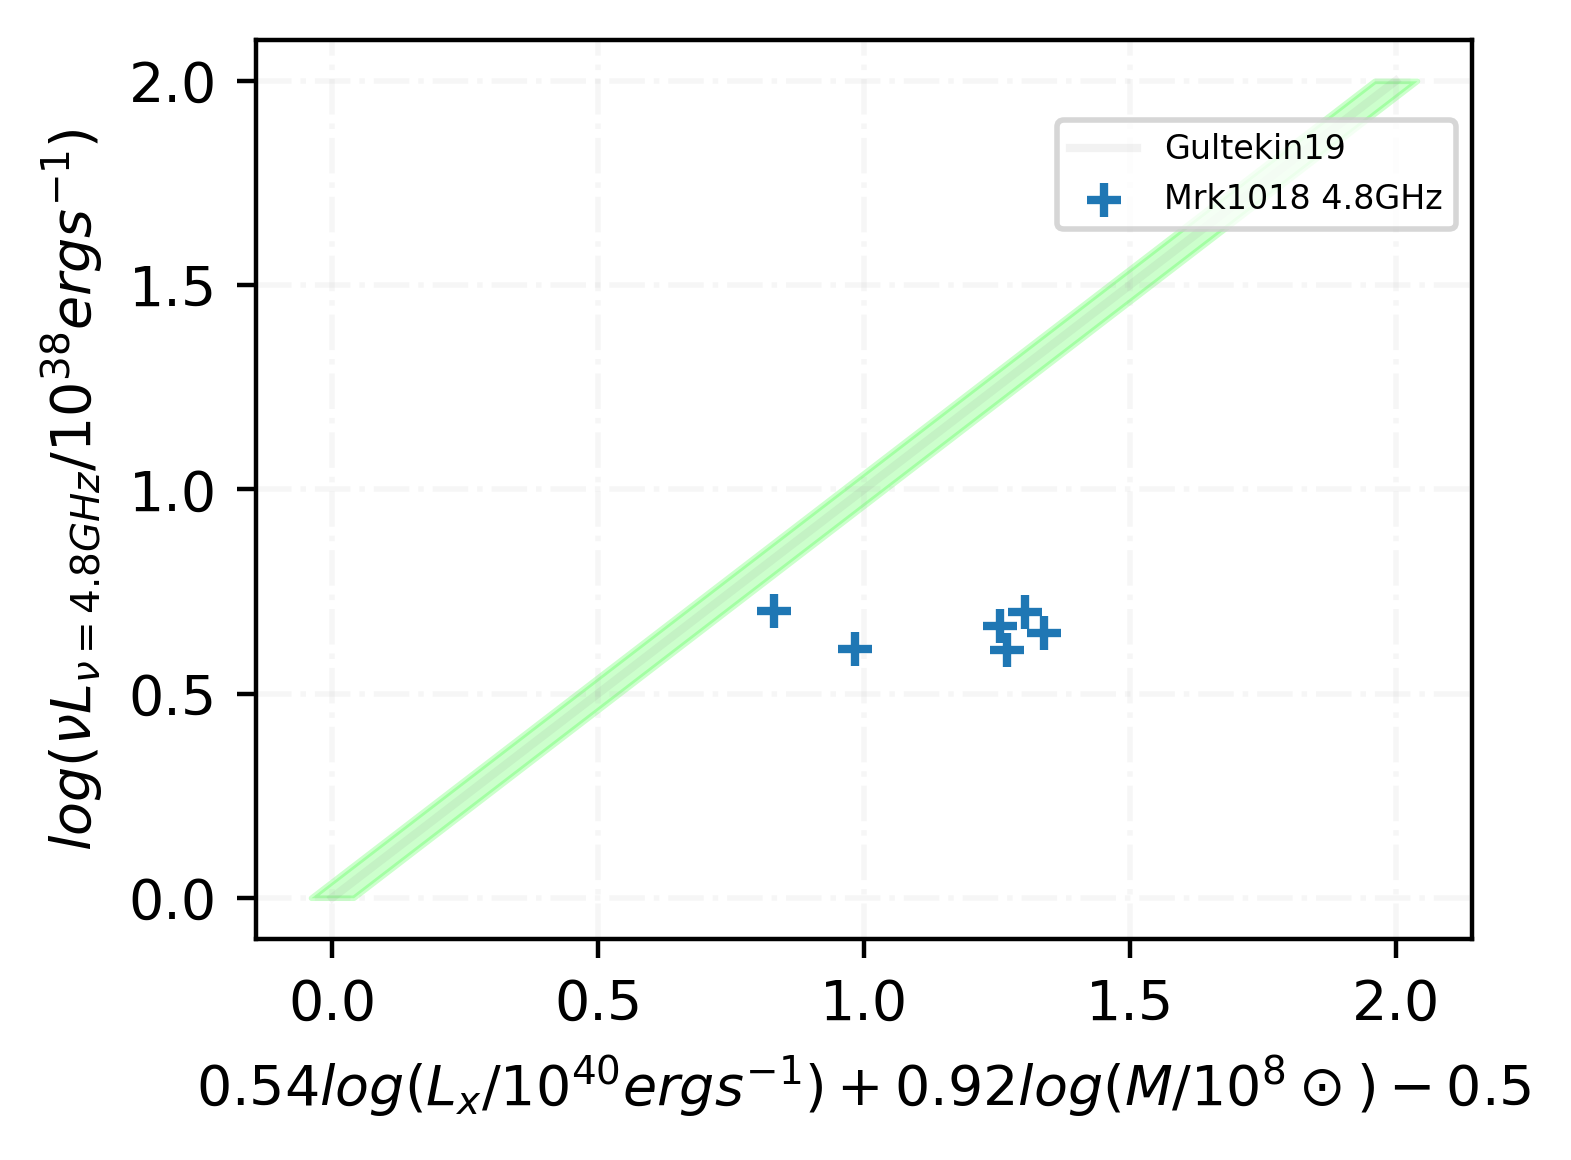

In [337]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
fontsize=16
fontsize_s=10

fig = plt.figure(figsize=(4,3),dpi=400)
ax = fig.add_subplot(111)


xmrk1018=(0.59*np.log10(radio_xray_sel1['Lx']*10**(-40))+ np.log10(BH_mass.value*10**(-8))-0.55)/1.09
ymrk1018=np.log10(radio_xray_sel1['LR4.8']*10**(-38))
plt.scatter(xmrk1018,ymrk1018,marker='+',label='Mrk1018 4.8GHz')

'''xngc7213=(0.59*np.log10(10**NGC7213['LogLx']*10**(-40))+ np.log10(m_ngc7213.value*10**(-8))-0.55)/1.09
yngc7213=np.log10(10**NGC7213['LogLr']*10**(-38))
plt.scatter(xngc7213,yngc7213,color='grey',marker='+',label='NGC7213 4.8GHz')

xngc7213_8=(0.59*np.log10(10**NGC7213_8['LogLx']*10**(-40))+ np.log10(m_ngc7213.value*10**(-8))-0.55)/1.09
yngc7213_8=np.log10(10**NGC7213_8['LogLr']*10**(-38))
plt.scatter(xngc7213_8,yngc7213_8,color='grey',marker='*',label='NGC7213 8.4GHz')'''


'''xmrk590=(0.59*np.log10(mrk590['Lx']*10**(-40))+ np.log10(m_mrk590.value*10**(-8))-0.55)/1.09
ymrk590=np.log10(mrk590['Lr']*10**(-38))
plt.scatter(xmrk590,ymrk590,marker='+',label='Mrk590 5GHz')'''

px=np.linspace(0,2,10)
plt.plot(px,px,alpha=0.1,color='grey',label="Gultekin19")
errorfill_x(px, px,xerr=0.04,color='lime',alpha_fill=0.2,ax=ax)
#plt.show()

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.85),ncol=1,fontsize=6,loc='right',frameon=True)    
#
#plt.semilogx()
#plt.semilogy()
plt.xlabel(r'$0.54log(L_{x}/10^{40} erg s^{-1})+0.92log(M/10^{8}\odot)-0.5$')
plt.ylabel(r'$log(\nu L_{\nu=4.8GHz}/10^{38}erg s^{-1})$')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('Mrk1018_radio_xray_Gultekin19.png',dpi=400)


## Xie 2017

In [ ]:
1.09 , 0.70 , 11.61 

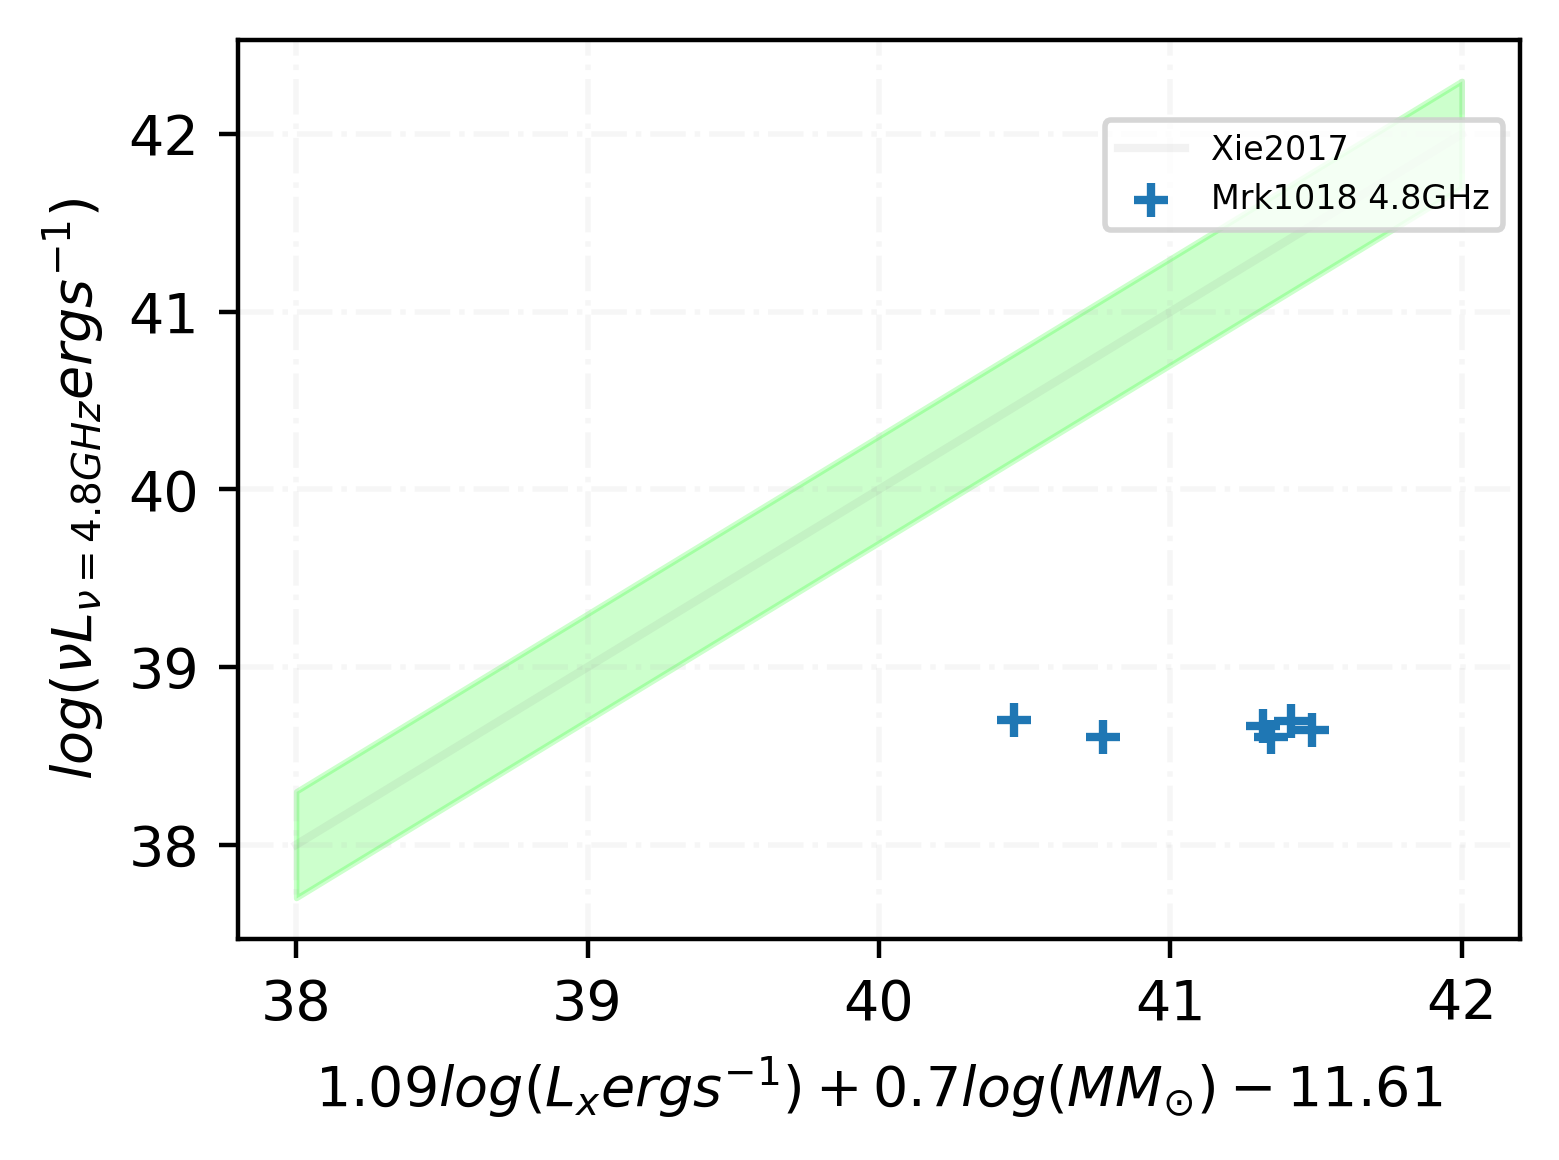

In [338]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
fontsize=16
fontsize_s=10

fig = plt.figure(figsize=(4,3),dpi=400)
ax = fig.add_subplot(111)


xmrk1018=(1.09*np.log10(radio_xray_sel1['Lx'])+ 0.7*np.log10(BH_mass.value))-11.61
ymrk1018=np.log10(radio_xray_sel1['LR4.8'])
plt.scatter(xmrk1018,ymrk1018,marker='+',label='Mrk1018 4.8GHz')

'''xngc7213=(0.59*np.log10(10**NGC7213['LogLx']*10**(-40))+ np.log10(m_ngc7213.value*10**(-8))-0.55)/1.09
yngc7213=np.log10(10**NGC7213['LogLr']*10**(-38))
plt.scatter(xngc7213,yngc7213,color='grey',marker='+',label='NGC7213 4.8GHz')

xngc7213_8=(0.59*np.log10(10**NGC7213_8['LogLx']*10**(-40))+ np.log10(m_ngc7213.value*10**(-8))-0.55)/1.09
yngc7213_8=np.log10(10**NGC7213_8['LogLr']*10**(-38))
plt.scatter(xngc7213_8,yngc7213_8,color='grey',marker='*',label='NGC7213 8.4GHz')'''


'''xmrk590=(0.59*np.log10(mrk590['Lx']*10**(-40))+ np.log10(m_mrk590.value*10**(-8))-0.55)/1.09
ymrk590=np.log10(mrk590['Lr']*10**(-38))
plt.scatter(xmrk590,ymrk590,marker='+',label='Mrk590 5GHz')'''

px=np.linspace(38,42,10)
plt.plot(px,px,alpha=0.1,color='grey',label="Xie2017")
errorfill(px, px,yerr=0.3,color='lime',alpha_fill=0.2,ax=ax)
#plt.show()

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.85),ncol=1,fontsize=6,loc='right',frameon=True)    
#
#plt.semilogx()
#plt.semilogy()
plt.xlabel(r'$1.09log(L_{x} erg s^{-1})+0.7log(M M_{\odot})-11.61$')
plt.ylabel(r'$log(\nu L_{\nu=4.8GHz} erg s^{-1})$')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('Mrk1018_radio_xray_Xie2017.png',dpi=400)


In [221]:
# 0.6 LogLx + 0.78 LogM        LogLr
# 文件中的distance = 25 Mpc.
# Mbh = 9.6*10^7 Msun.

m_ngc7213=9.6*10**7*u.solMass
d_ngc7213=22.8*u.Mpc.to(u.cm)
Ledd_ngc7213=1.26*10**38*m_ngc7213/u.solMass

m_mrk590=4.75*10**7*u.solMass
d_mrk590=107*u.Mpc.to(u.cm)
Ledd_mrk590=1.26*10**38*m_mrk590/u.solMass

In [222]:
NGC7213=pd.read_csv('ngc7213-rx-Bell2011-fig7_data.txt',header=None,sep='\s+')
NGC7213_8=pd.read_csv('ngc7213-rx-Bell2011b_data.txt',header=None,sep='\s+')
NGC7213.columns=['0.6LogLx+0.78LogM','LogLr']
NGC7213_8.columns=['0.6LogLx+0.78LogM','LogLr']


NGC7213['LogLx']=(NGC7213['0.6LogLx+0.78LogM']-np.log10(m_ngc7213.value)*0.78)/0.6
NGC7213_8['LogLx']=(NGC7213_8['0.6LogLx+0.78LogM']-np.log10(m_ngc7213.value)*0.78)/0.6

mrk590=pd.read_csv('/home/brettlv/python_code/Mrk590/mrk590_xray_radio.csv',header=0,sep=',')
mrk590['Lx']=4*np.pi*d_mrk590**2*mrk590['Fx']
mrk590['Lr']=mrk590['Lx']*10**(mrk590['log(Lr/Lx)'])

In [229]:
m_mrk590.value

47500000.0

In [223]:
mrk590.columns,m_ngc7213.value,10**7.84

(Index(['year', 'Fx', 'Lbol/Ledd', 'log(Lr/Lx)', 'Lx', 'Lr'], dtype='object'),
 96000000.0,
 69183097.09189363)

In [225]:
mrk590

,year,Fx,Lbol/Ledd,log(Lr/Lx),Lx,Lr
0,1984,2.700000e-11,0.061,-5.3,3.698642e+43,1.853712e+38
1,2015,2.600000e-12,0.006,-4.3,3.561655e+42,1.785056e+38


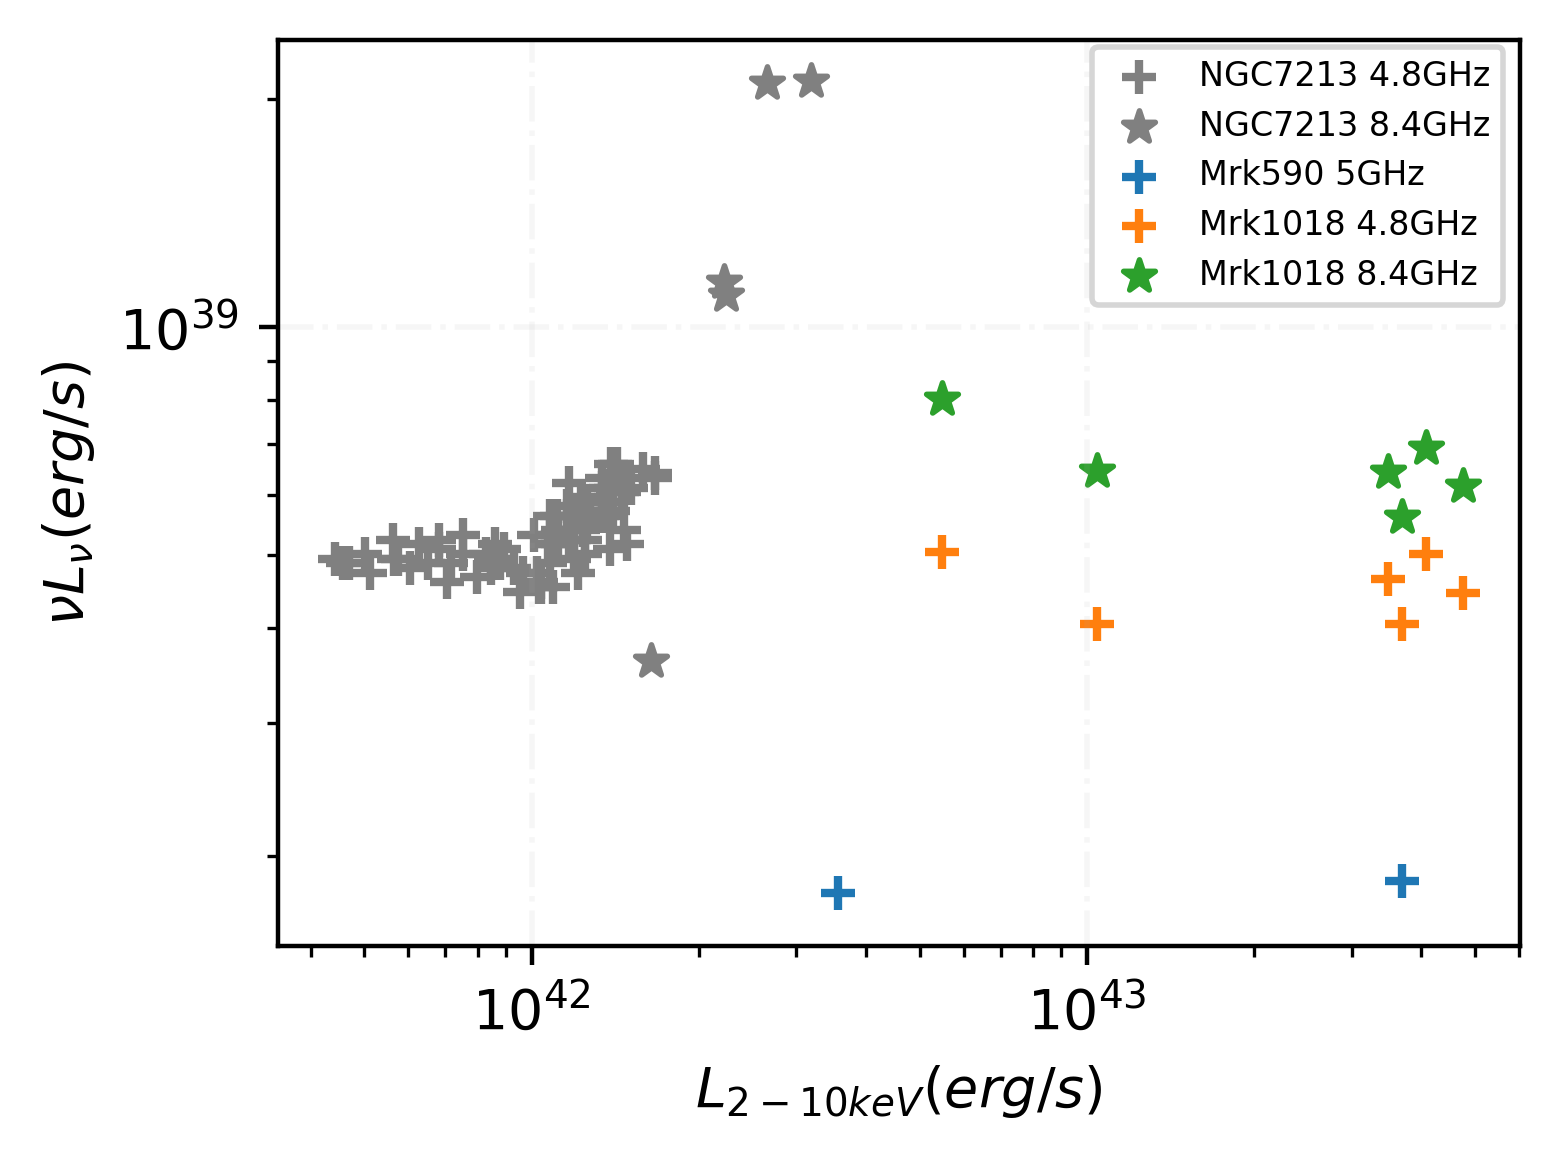

In [224]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
fontsize=16
fontsize_s=10

fig = plt.figure(figsize=(4,3),dpi=400)
ax = fig.add_subplot(111)

plt.scatter(10**NGC7213['LogLx'],10**NGC7213['LogLr'],color='grey',marker='+',label='NGC7213 4.8GHz')
plt.scatter(10**NGC7213_8['LogLx'],10**NGC7213_8['LogLr'],color='grey',marker='*',label='NGC7213 8.4GHz')

plt.scatter(mrk590['Lx'],mrk590['Lr'],marker='+',label='Mrk590 5GHz')
plt.scatter(radio_xray_sel1['Lx'],radio_xray_sel1['LR4.8'],marker='+',label='Mrk1018 4.8GHz')
plt.scatter(radio_xray_sel1['Lx'],radio_xray_sel1['LR8.4'],marker='*',label='Mrk1018 8.4GHz')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.85),ncol=1,fontsize=6,loc='right',frameon=True)    
#
plt.semilogx()
plt.semilogy()
plt.xlabel(r'$L_{2-10keV}(erg/s)$')
plt.ylabel(r'$\nu L_{\nu}(erg/s)$')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('Mrk1018_ngc7213_radio_xray.png',dpi=400)   

In [182]:
NGC7213_8

,0.6LogLx+0.78LogM,LogLr,LogLx
0,31.555604,38.557762,42.215721
1,31.636484,39.042419,42.350520
2,31.634725,39.058664,42.347590
3,31.680440,39.321300,42.423780
4,31.727912,39.324007,42.502901


## Richard M. Plotkin2012

In [ ]:
log LX = (1.45 ± 0.04)log LR − (0.88 ± 0.06)log MBH − 6.07 ± 1.10, with
σint = 0.07 ± 0.05 dex. 

In [297]:
-0.88*7.84-6.07

-12.9692

In [ ]:
logLx=1.45LogLR-12.9692

In [ ]:
LogLR=1/1.45Lx+12.9692/1.45

In [124]:
1/1.45,12.9692/1.45

(0.6896551724137931, 8.944275862068967)

In [14]:
-0.88*np.log10(BH_mass.value)-6.07

-12.9692

In [296]:
np.log10(BH_mass.value)*(-0.88)-6.07

-12.9692

In [270]:
radio_xray_latex_data=pd.read_excel('/Users/brettlv/python_code/Mrk1018/data/Mrk1018radio_xray_to_latex.xlsx',sheet_name='工作表5')

In [271]:
radio_xray_latex_data['nu_L5GHz']=4*np.pi*D_cm.value**2*radio_xray_latex_data['F_5GHz']*5*1.0e9*1.0e-26
radio_xray_latex_data['nu_L5GHz_err']=4*np.pi*D_cm.value**2*radio_xray_latex_data['F_5GHz_err']*5*1.0e9*1.0e-26
radio_xray_latex_data['Lx']=4*np.pi*D_cm.value**2*radio_xray_latex_data['F_Xray']*1.0e-12
radio_xray_latex_data['Lx_err']=4*np.pi*D_cm.value**2*radio_xray_latex_data['F_Xray_err']*1.0e-12

In [276]:
radio_xray_latex_data['Lx']/Ledd

0    0.004832
1    0.003817
2    0.000614
3    0.001179
4    0.001015
5    0.000340
Name: Lx, dtype: float64

In [279]:
(max(radio_xray_latex_data['nu_L5GHz'])-min(radio_xray_latex_data['nu_L5GHz']))/np.average(radio_xray_latex_data['nu_L5GHz'])

0.3561930226012834

In [272]:
radio_xray_latex_data.to_csv('radio_xray_latex_data.csv')

In [298]:
radio_xray_latex_data

,T_radio,F_5GHz,F_5GHz_err,T_Xray,F_Xray,F_Xray_err,Delta_T,note,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,nu_L5GHz,nu_L5GHz_err,Lx,Lx_err
0,54926,2.293436,0.299976,55015.000000,10.000000,0.500000,-89.000000,NaN,49361.0,2.87,0.49,48999.0,3.5,0.1015,362.0,ROSAT,4.830302e+38,6.317915e+37,4.212284e+43,2.106142e+42
1,56550,2.627896,0.372480,56450.090069,7.899410,0.821478,99.909931,NaN,52484.0,2.83,0.37,53385.0,10.4,0.5000,901.0,XMM,5.534721e+38,7.844947e+37,3.327455e+43,3.460297e+42
2,57481,2.560000,0.010000,57443.000000,1.270000,0.030000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.391723e+38,2.106142e+36,5.349600e+42,1.263685e+41
3,57768,2.070000,0.015000,57801.000000,2.440000,0.020000,-33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.359713e+38,3.159213e+36,1.027797e+43,8.424567e+40
4,58087,1.973210,0.138079,58123.000000,2.100000,0.100000,-36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.155859e+38,2.908140e+37,8.845795e+42,4.212284e+41
5,58472,2.825082,0.393853,58445.185833,0.703731,0.245843,26.814167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.950024e+38,8.295106e+37,2.964316e+42,1.035559e+42


In [243]:
radio_xray_latex_data.columns

Index(['T_radio', 'F_5GHz', 'F_5GHz_err', 'T_Xray', 'F_Xray', 'F_Xray_err',
       'Delta_T', 'note', 'nu_L5GHz', 'nu_L5GHz_err', 'Lx', 'Lx_err'],
      dtype='object')

## plot_radio_xray

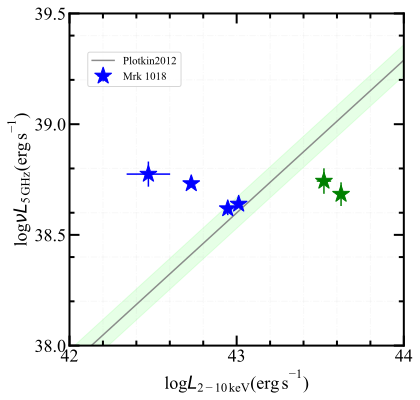

In [301]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)


for i in np.arange(len(radio_xray_latex_data['nu_L5GHz'])):
    if radio_xray_latex_data.iloc[i]['T_Xray']<=54853:
        color='r'
    elif radio_xray_latex_data.iloc[i]['T_Xray']<=57033:
        color='g'
    else:
        color='b'
    
    rmrk1018=np.log10(radio_xray_latex_data.iloc[i]['nu_L5GHz'])
    rerrmrk1018=np.log10(1+radio_xray_latex_data.iloc[i]['nu_L5GHz_err']/radio_xray_latex_data.iloc[i]['nu_L5GHz'])

    xmrk1018=np.log10(radio_xray_latex_data.iloc[i]['Lx'])
    xerrmrk1018=np.log10(1+radio_xray_latex_data.iloc[i]['Lx_err']/radio_xray_latex_data.iloc[i]['Lx'])

    #ax.scatter(xmrk1018,rmrk1018,marker='+',label='Mrk1018')
    ax.errorbar(xmrk1018,rmrk1018,xerr=xerrmrk1018,yerr=rerrmrk1018,
                color=color,marker='*',label='Mrk 1018',
                fmt='o',ls='',markersize=18,mew=1, capsize=0,)
    #ax.text(xmrk1018,rmrk1018,int(radio_xray_latex_data.iloc[i]['T_Xray']),fontsize=10)
    


#plt.errorbar(radio_xray_latex_data['nu_L5GHz'],radio_xray_latex_data['Lx'],xerr=radio_xray_latex_data['nu_L5GHz_err'],yerr=radio_xray_latex_data['Lx_err'],marker='+',label='Mrk1018')

px=np.linspace(42,44,10)
ax.plot(px,1/1.45*px+12.9692/1.45,alpha=0.9,color='grey',label="Plotkin2012")
errorfill(px,1/1.45*px+12.9692/1.45,yerr=0.07,color='lime',alpha_fill=0.1,ax=ax)
#plt.show()
#plt.hlines(1.6849134211044933e+43)
#plt.hlines(2.9485984869328635e+43)
#plt.axvspan(np.log10(1.6849134211044933e+43),np.log10(2.9485984869328635e+43), facecolor='#2ca02c', alpha=0.1)

#ax.text(42.,37.8,r'$log\nu L_{5GHz}$=0.69 $log L_{2-10keV}$+8.94',rotation=29,alpha=0.9)


handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = [h for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.35, 0.9),
         numpoints=1,fontsize=11. )

#plt.semilogx()
#plt.semilogy()

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

ax.set_ylim(38,39.5)
ax.set_xlim(42,44)
ax.set_ylabel(r'log$\nu L_{\mathregular{5\,GHz}} \mathregular{(erg\,s^{-1})}$')
ax.set_xlabel(r'log$ L_\mathregular{{2-10\,keV}} \mathregular{(erg\,s^{-1})}$')
#plt.style.use('default')
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

plt.grid(alpha=0.1,which='minor', linestyle='-.', linewidth=1)

fig.savefig('Mrk1018_radio_xray_Plotkin2012_Lx.png',dpi=400,
            transparent=False, bbox_inches='tight')


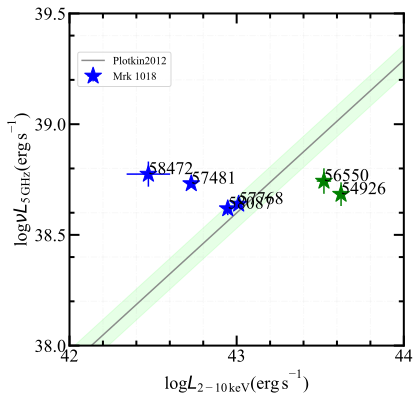

In [300]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)


for i in np.arange(len(radio_xray_latex_data['nu_L5GHz'])):
    if radio_xray_latex_data.iloc[i]['T_Xray']<=54853:
        color='r'
    elif radio_xray_latex_data.iloc[i]['T_Xray']<=57033:
        color='g'
    else:
        color='b'
    
    rmrk1018=np.log10(radio_xray_latex_data.iloc[i]['nu_L5GHz'])
    rerrmrk1018=np.log10(1+radio_xray_latex_data.iloc[i]['nu_L5GHz_err']/radio_xray_latex_data.iloc[i]['nu_L5GHz'])

    xmrk1018=np.log10(radio_xray_latex_data.iloc[i]['Lx'])
    xerrmrk1018=np.log10(1+radio_xray_latex_data.iloc[i]['Lx_err']/radio_xray_latex_data.iloc[i]['Lx'])

    #ax.scatter(xmrk1018,rmrk1018,marker='+',label='Mrk1018')
    ax.text(xmrk1018,rmrk1018,radio_xray_latex_data.iloc[i]['T_radio'])
    ax.errorbar(xmrk1018,rmrk1018,xerr=xerrmrk1018,yerr=rerrmrk1018,
                color=color,marker='*',label='Mrk 1018',
                fmt='o',ls='',markersize=18,mew=1, capsize=0,)
    #ax.text(xmrk1018,rmrk1018,int(radio_xray_latex_data.iloc[i]['T_Xray']),fontsize=10)
    


#plt.errorbar(radio_xray_latex_data['nu_L5GHz'],radio_xray_latex_data['Lx'],xerr=radio_xray_latex_data['nu_L5GHz_err'],yerr=radio_xray_latex_data['Lx_err'],marker='+',label='Mrk1018')

px=np.linspace(42,44,10)
ax.plot(px,1/1.45*px+12.9692/1.45,alpha=0.9,color='grey',label="Plotkin2012")
errorfill(px,1/1.45*px+12.9692/1.45,yerr=0.07,color='lime',alpha_fill=0.1,ax=ax)
#plt.show()
#plt.hlines(1.6849134211044933e+43)
#plt.hlines(2.9485984869328635e+43)
#plt.axvspan(np.log10(1.6849134211044933e+43),np.log10(2.9485984869328635e+43), facecolor='#2ca02c', alpha=0.1)

#ax.text(42.,37.8,r'$log\nu L_{5GHz}$=0.69 $log L_{2-10keV}$+8.94',rotation=29,alpha=0.9)


handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = [h for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.32, 0.9),
         numpoints=1,fontsize=11. )

#plt.semilogx()
#plt.semilogy()

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

ax.set_ylim(38,39.5)
ax.set_xlim(42,44)
ax.set_ylabel(r'log$\nu L_{\mathregular{5\,GHz}} \mathregular{(erg\,s^{-1})}$')
ax.set_xlabel(r'log$ L_\mathregular{{2-10\,keV}} \mathregular{(erg\,s^{-1})}$')
#plt.style.use('default')
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

plt.grid(alpha=0.1,which='minor', linestyle='-.', linewidth=1)

fig.savefig('Mrk1018_radio_xray_Plotkin2012_Lx_show_MJD.png',dpi=400,
            transparent=False, bbox_inches='tight')


In [255]:
radio_xray_latex_data

,T_radio,F_5GHz,F_5GHz_err,T_Xray,F_Xray,F_Xray_err,Delta_T,note,nu_L5GHz,nu_L5GHz_err,Lx,Lx_err
0,49361,2.870000,0.490000,48999.000000,3.500000,0.101500,362.000000,ROSAT,6.044627e+38,1.032009e+38,1.474299e+43,4.275468e+41
1,52484,2.830000,0.370000,53385.000000,10.400000,0.500000,901.000000,XMM,5.960381e+38,7.792725e+37,4.380775e+43,2.106142e+42
2,54926,2.293436,0.299976,55015.000000,10.000000,0.500000,-89.000000,NaN,4.830302e+38,6.317915e+37,4.212284e+43,2.106142e+42
3,56550,2.627896,0.372480,56450.090069,7.899410,0.821478,99.909931,NaN,5.534721e+38,7.844947e+37,3.327455e+43,3.460297e+42
4,57481,2.560000,0.010000,57443.000000,1.270000,0.030000,38.000000,NaN,5.391723e+38,2.106142e+36,5.349600e+42,1.263685e+41
5,57768,2.070000,0.015000,57801.000000,2.440000,0.020000,-33.000000,NaN,4.359713e+38,3.159213e+36,1.027797e+43,8.424567e+40
6,58087,1.973210,0.138079,58123.000000,2.100000,0.100000,-36.000000,NaN,4.155859e+38,2.908140e+37,8.845795e+42,4.212284e+41
7,58472,2.825082,0.393853,58445.185833,0.703731,0.245843,26.814167,NaN,5.950024e+38,8.295106e+37,2.964316e+42,1.035559e+42


In [134]:
np.arctan(0.69)/np.pi*180

34.60567555163856

In [229]:
radio_xray_latex_data['nu_L5GHz_err']/(radio_xray_latex_data['nu_L5GHz'])

0    0.170732
1    0.130742
2    0.130798
3    0.141741
4    0.003906
5    0.007246
6    0.069977
7    0.139413
dtype: float64

In [56]:
pwd

'/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data'

In [ ]:
log LR = (log LX + (0.88 ± 0.06)log MBH + 6.07 ± 1.10)/(1.45 ± 0.04)

In [302]:
1/1.45,0.88/1.45,6.07/1.45

(0.6896551724137931, 0.6068965517241379, 4.186206896551725)

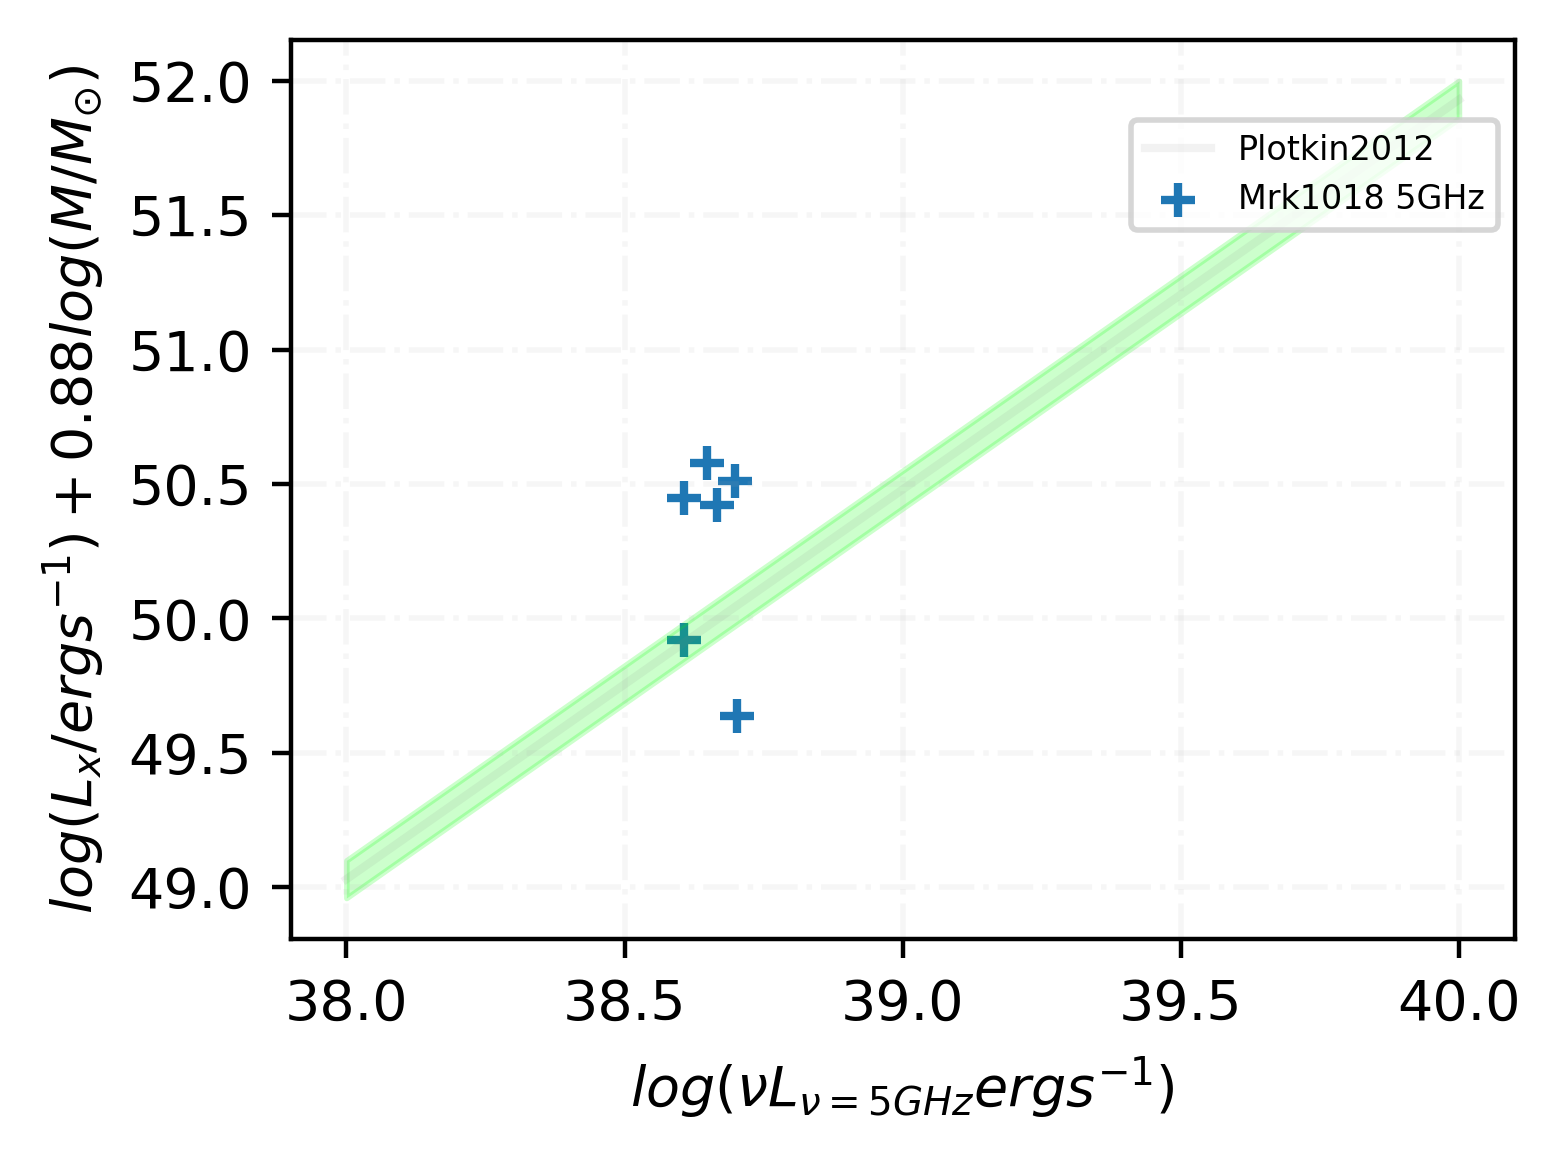

In [339]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
fontsize=16
fontsize_s=10

fig = plt.figure(figsize=(4,3),dpi=400)
ax = fig.add_subplot(111)



xmrk1018=np.log10(radio_xray_sel1['LR4.8'])
ymrk1018=(np.log10(radio_xray_sel1['Lx'])+0.88*np.log10(BH_mass.value))

plt.scatter(xmrk1018,ymrk1018,marker='+',label='Mrk1018 5GHz')

'''xngc7213=(0.59*np.log10(10**NGC7213['LogLx']*10**(-40))+ np.log10(m_ngc7213.value*10**(-8))-0.55)/1.09
yngc7213=np.log10(10**NGC7213['LogLr']*10**(-38))
plt.scatter(xngc7213,yngc7213,color='grey',marker='+',label='NGC7213 4.8GHz')

xngc7213_8=(0.59*np.log10(10**NGC7213_8['LogLx']*10**(-40))+ np.log10(m_ngc7213.value*10**(-8))-0.55)/1.09
yngc7213_8=np.log10(10**NGC7213_8['LogLr']*10**(-38))
plt.scatter(xngc7213_8,yngc7213_8,color='grey',marker='*',label='NGC7213 8.4GHz')'''


'''xmrk590=(0.59*np.log10(mrk590['Lx']*10**(-40))+ np.log10(m_mrk590.value*10**(-8))-0.55)/1.09
ymrk590=np.log10(mrk590['Lr']*10**(-38))
plt.scatter(xmrk590,ymrk590,marker='+',label='Mrk590 5GHz')'''

px=np.linspace(38,40,10)
plt.plot(px,px*1.45-6.07,alpha=0.1,color='grey',label="Plotkin2012")
errorfill(px,px*1.45-6.07,yerr=0.07,color='lime',alpha_fill=0.2,ax=ax)
#plt.show()

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.85),ncol=1,fontsize=6,loc='right',frameon=True)    
#
#plt.semilogx()
#plt.semilogy()
plt.ylabel(r'$log(L_{x}/erg s^{-1})+0.88 log(M/M_{\odot})$')
plt.xlabel(r'$log(\nu L_{\nu=5GHz} erg s^{-1})$')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('Mrk1018_radio_xray_Plotkin2012_LR.png',dpi=400)


In [ ]:
log LR = (log LX + (0.88 ± 0.06)log MBH + 6.07 ± 1.10)/(1.45 ± 0.04)

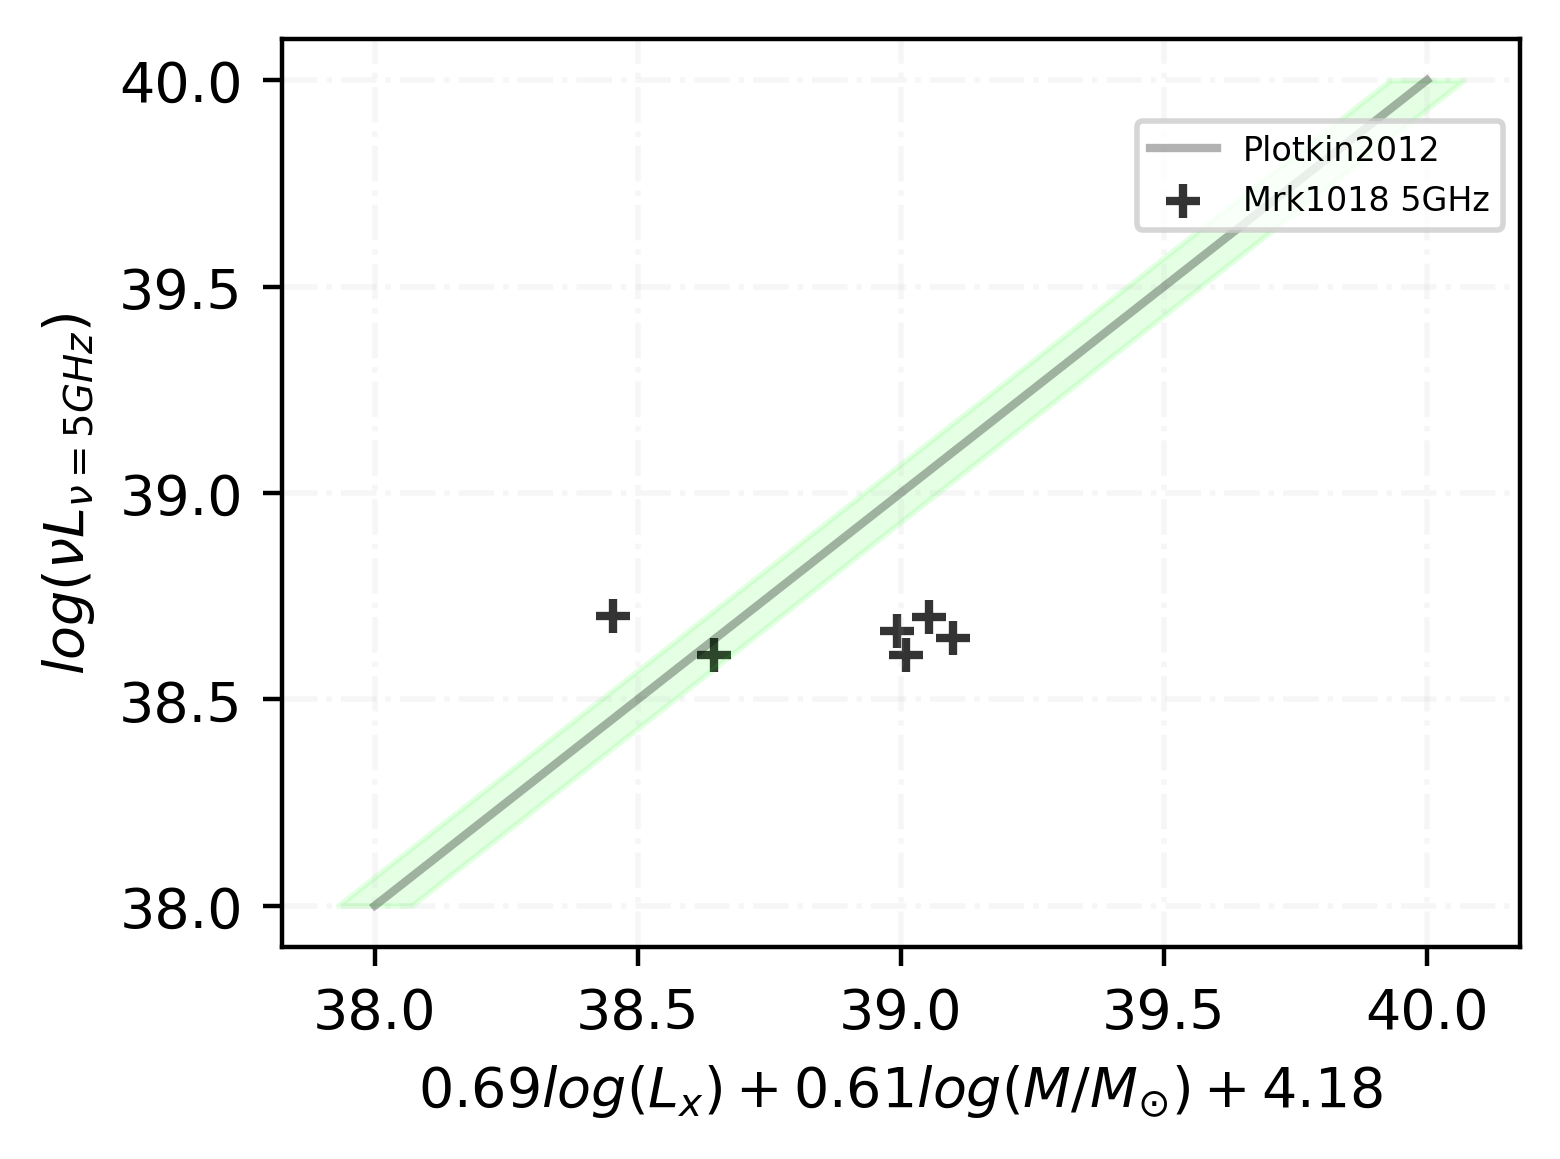

In [342]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
fontsize=16
fontsize_s=10

fig = plt.figure(figsize=(4,3),dpi=400)
ax = fig.add_subplot(111)


xmrk1018=(0.69*np.log10(radio_xray_sel1['Lx'])+ 0.61*np.log10(BH_mass.value))+4.18
ymrk1018=np.log10(radio_xray_sel1['LR4.8'])
plt.scatter(xmrk1018,ymrk1018,marker='+',color='black',alpha=0.8,label='Mrk1018 5GHz')

'''xngc7213=(0.59*np.log10(10**NGC7213['LogLx']*10**(-40))+ np.log10(m_ngc7213.value*10**(-8))-0.55)/1.09
yngc7213=np.log10(10**NGC7213['LogLr']*10**(-38))
plt.scatter(xngc7213,yngc7213,color='grey',marker='+',label='NGC7213 4.8GHz')

xngc7213_8=(0.59*np.log10(10**NGC7213_8['LogLx']*10**(-40))+ np.log10(m_ngc7213.value*10**(-8))-0.55)/1.09
yngc7213_8=np.log10(10**NGC7213_8['LogLr']*10**(-38))
plt.scatter(xngc7213_8,yngc7213_8,color='grey',marker='*',label='NGC7213 8.4GHz')'''


'''xmrk590=(0.59*np.log10(mrk590['Lx']*10**(-40))+ np.log10(m_mrk590.value*10**(-8))-0.55)/1.09
ymrk590=np.log10(mrk590['Lr']*10**(-38))
plt.scatter(xmrk590,ymrk590,marker='+',label='Mrk590 5GHz')'''

px=np.linspace(38,40,10)
plt.plot(px,px,alpha=0.3,color='black',label="Plotkin2012")
errorfill_x(px, px,xerr=0.07,color='lime',alpha_fill=0.1,ax=ax)
#plt.show()

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.85),ncol=1,fontsize=6,loc='right',frameon=True)    
#
#plt.semilogx()
#plt.semilogy()
plt.xlabel(r'$0.69log(L_{x})+0.61log(M/M_{\odot})+4.18$')
plt.ylabel(r'$log(\nu L_{\nu=5GHz} )$')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('Mrk1018_radio_xray_Plotkin2012.png',dpi=400)


## Merloni03

In particular, we show that the sources define a 'Fundamental Plane' in the three-dimensional (logLR, logLX, logM) space, 

given by logLR= (0.60+0.11-0.11) logLX+ (0.78+0.11-0.09) logM+ 7.33+4.05-4.07, with a substantial scatter of σR= 0.88. 

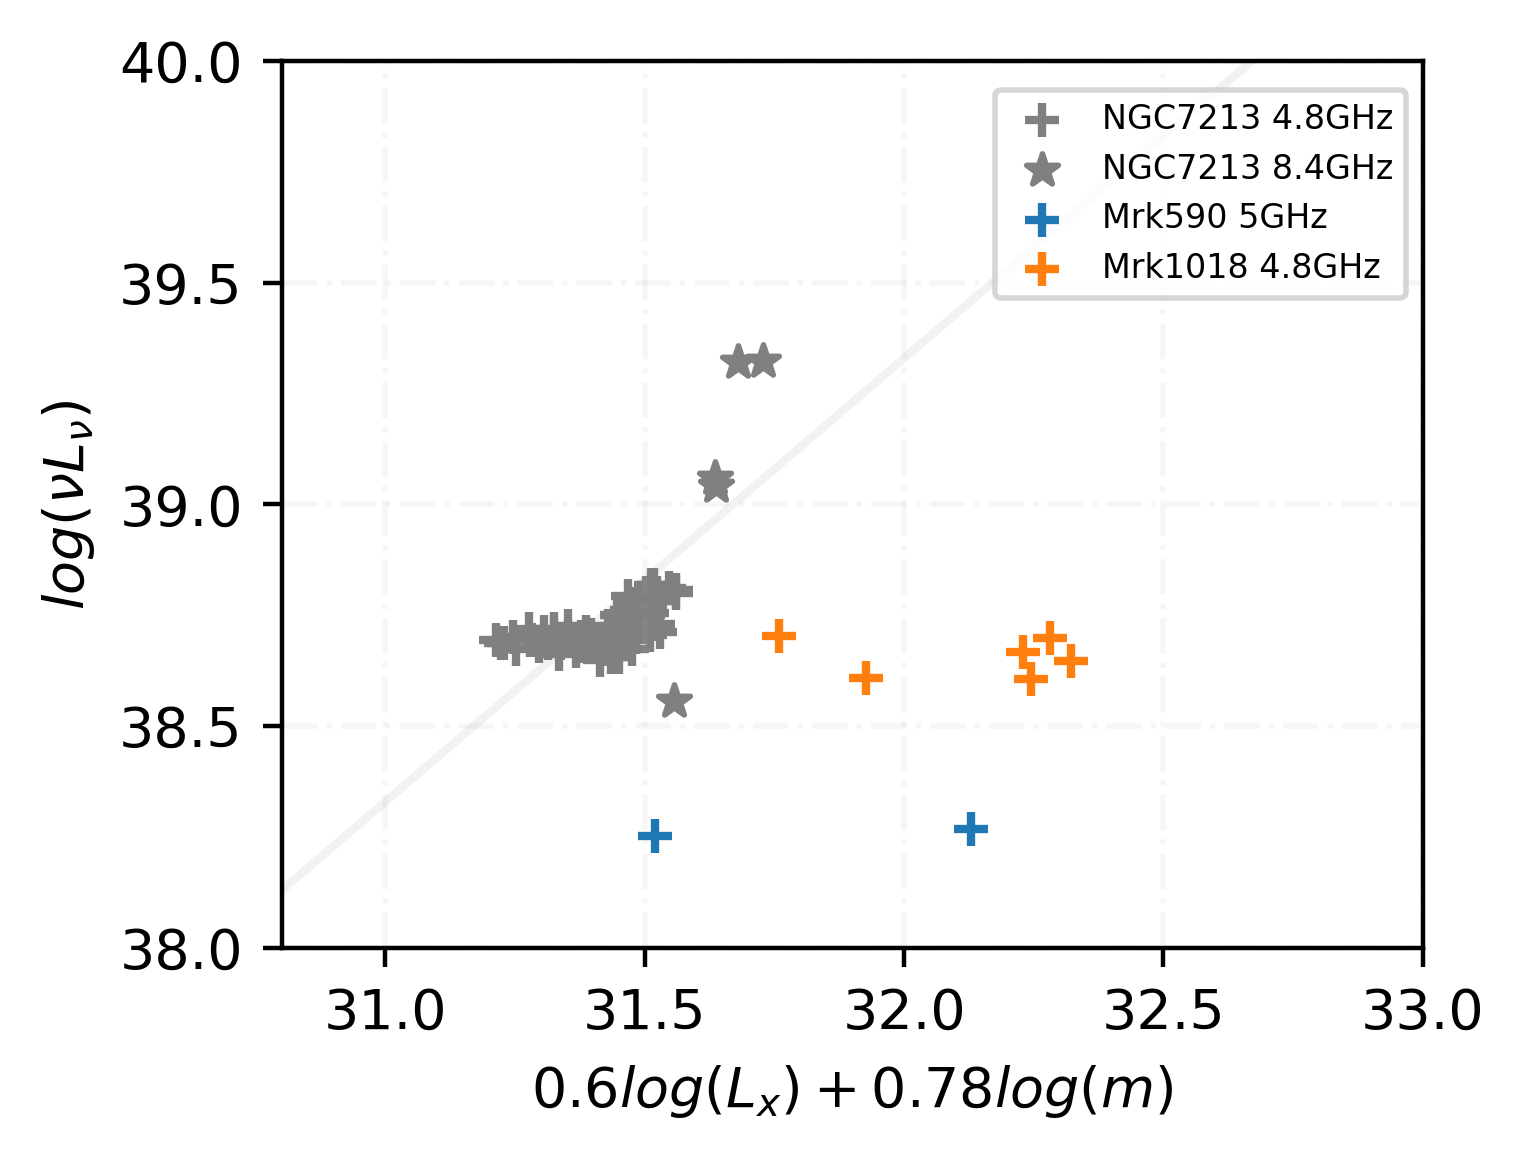

In [255]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
fontsize=16
fontsize_s=10

fig = plt.figure(figsize=(4,3),dpi=400)
ax = fig.add_subplot(111)

plt.scatter(0.6*NGC7213['LogLx']+0.78*np.log10(m_ngc7213.value),NGC7213['LogLr'],color='grey',marker='+',label='NGC7213 4.8GHz')
plt.scatter(0.6*NGC7213_8['LogLx']+0.78*np.log10(m_ngc7213.value),NGC7213_8['LogLr'],color='grey',marker='*',label='NGC7213 8.4GHz')

plt.scatter(0.6*np.log10(mrk590['Lx'])+0.78*np.log10(m_mrk590.value),np.log10(mrk590['Lr']),marker='+',label='Mrk590 5GHz')
plt.scatter(0.6*np.log10(radio_xray_sel1['Lx'])+0.78*7.84,np.log10(radio_xray_sel1['LR4.8']),marker='+',label='Mrk1018 4.8GHz')
#plt.scatter(radio_xray_sel1['Lx'],radio_xray_sel1['LR8.4'],marker='*',label='Mrk1018 8.4GHz')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.85),ncol=1,fontsize=6,loc='right',frameon=True)    
#
#plt.semilogx()
#plt.semilogy()

px=np.linspace(18,36,10)
plt.plot(px,px+7.33,alpha=0.1,color='grey',label="Merloni2003")

plt.xlim(30.8,33)
plt.ylim(38,40)

plt.xlabel(r'$0.6log(L_{x})+0.78log(m)$')

plt.ylabel(r'$log(\nu L_{\nu})$')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('Mrk1018_ngc7213_radio_xray_mass_log_merloni03.png',dpi=400)   

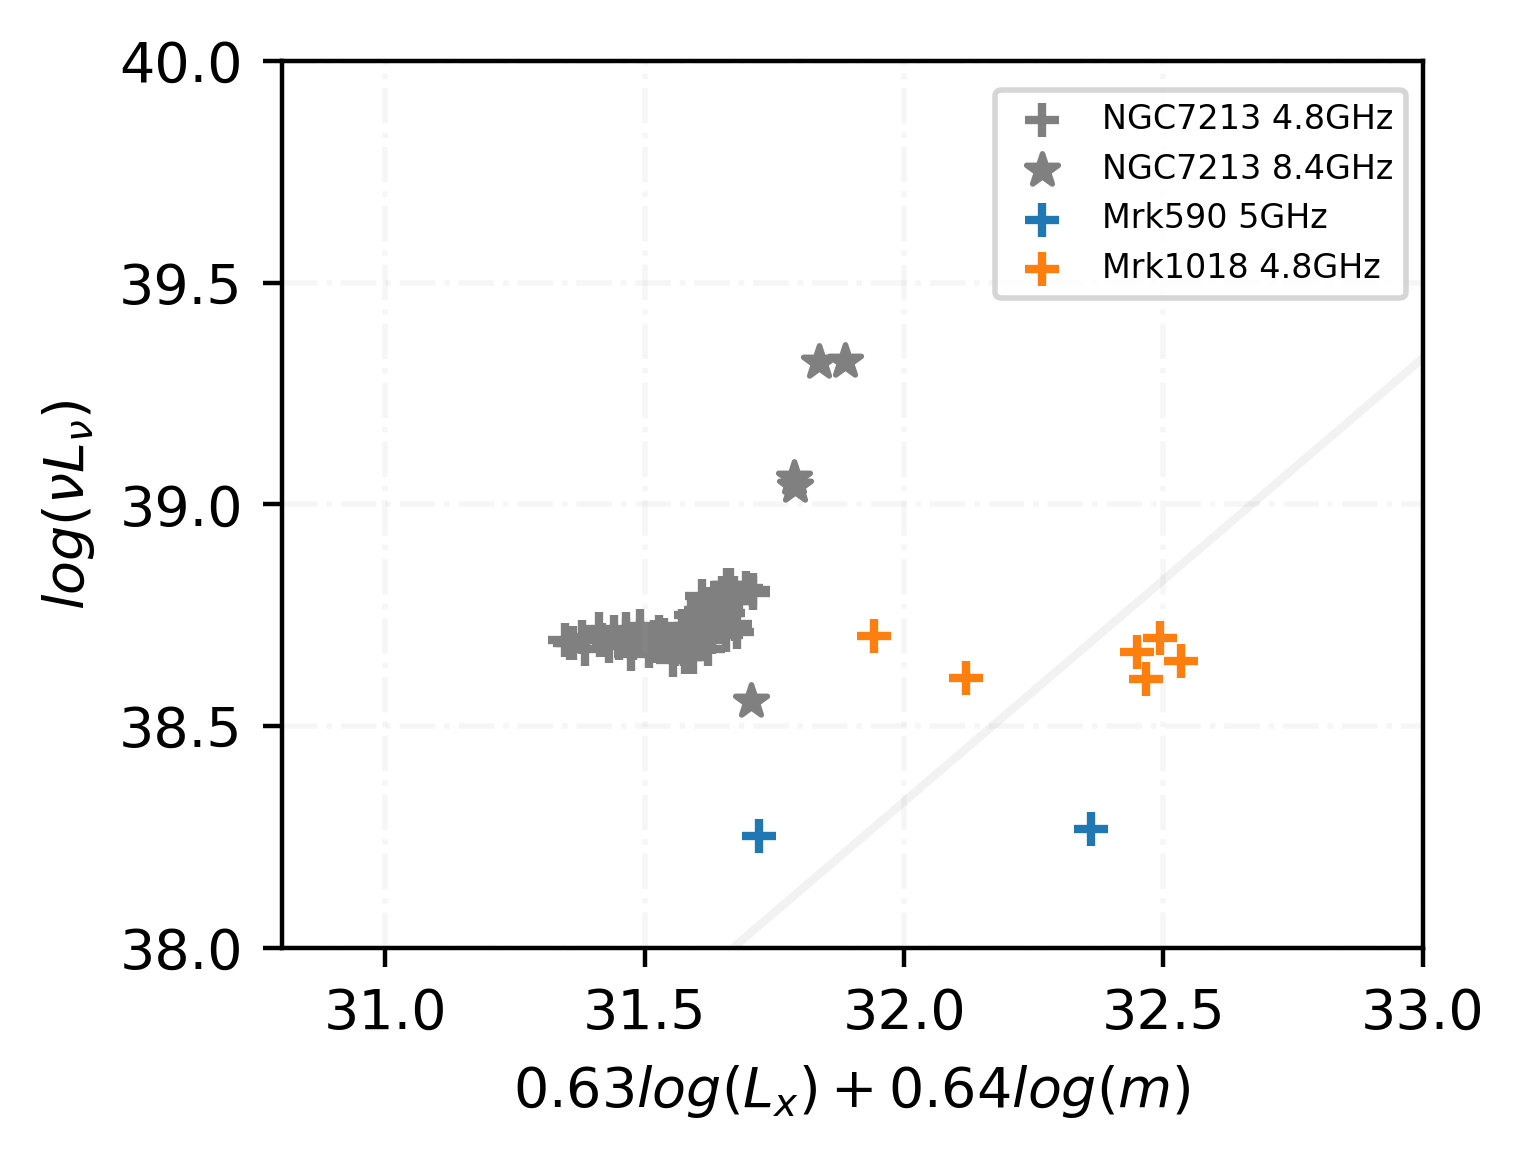

In [233]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
fontsize=16
fontsize_s=10

fig = plt.figure(figsize=(4,3),dpi=400)
ax = fig.add_subplot(111)

plt.scatter(0.63*NGC7213['LogLx']+0.64*np.log10(m_ngc7213.value),NGC7213['LogLr'],color='grey',marker='+',label='NGC7213 4.8GHz')
plt.scatter(0.63*NGC7213_8['LogLx']+0.64*np.log10(m_ngc7213.value),NGC7213_8['LogLr'],color='grey',marker='*',label='NGC7213 8.4GHz')
plt.scatter(0.63*np.log10(mrk590['Lx'])+0.64*np.log10(m_mrk590.value),np.log10(mrk590['Lr']),marker='+',label='Mrk590 5GHz')
plt.scatter(0.63*np.log10(radio_xray_sel1['Lx'])+0.64*7.84,np.log10(radio_xray_sel1['LR4.8']),marker='+',label='Mrk1018 4.8GHz')
#plt.scatter(radio_xray_sel1['Lx'],radio_xray_sel1['LR8.4'],marker='*',label='Mrk1018 8.4GHz')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.85),ncol=1,fontsize=6,loc='right',frameon=True)    
#
#plt.semilogx()
#plt.semilogy()

px=np.linspace(18,36,10)
plt.plot(px,px+6.33,alpha=0.1,color='grey',label="Koerding2006")

plt.xlim(30.8,33)
plt.ylim(38,40)

plt.xlabel(r'$0.63log(L_{x})+0.64log(m)$')

plt.ylabel(r'$log(\nu L_{\nu})$')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('Mrk1018_ngc7213_radio_xray_mass_log_koerding06.png',dpi=400)   

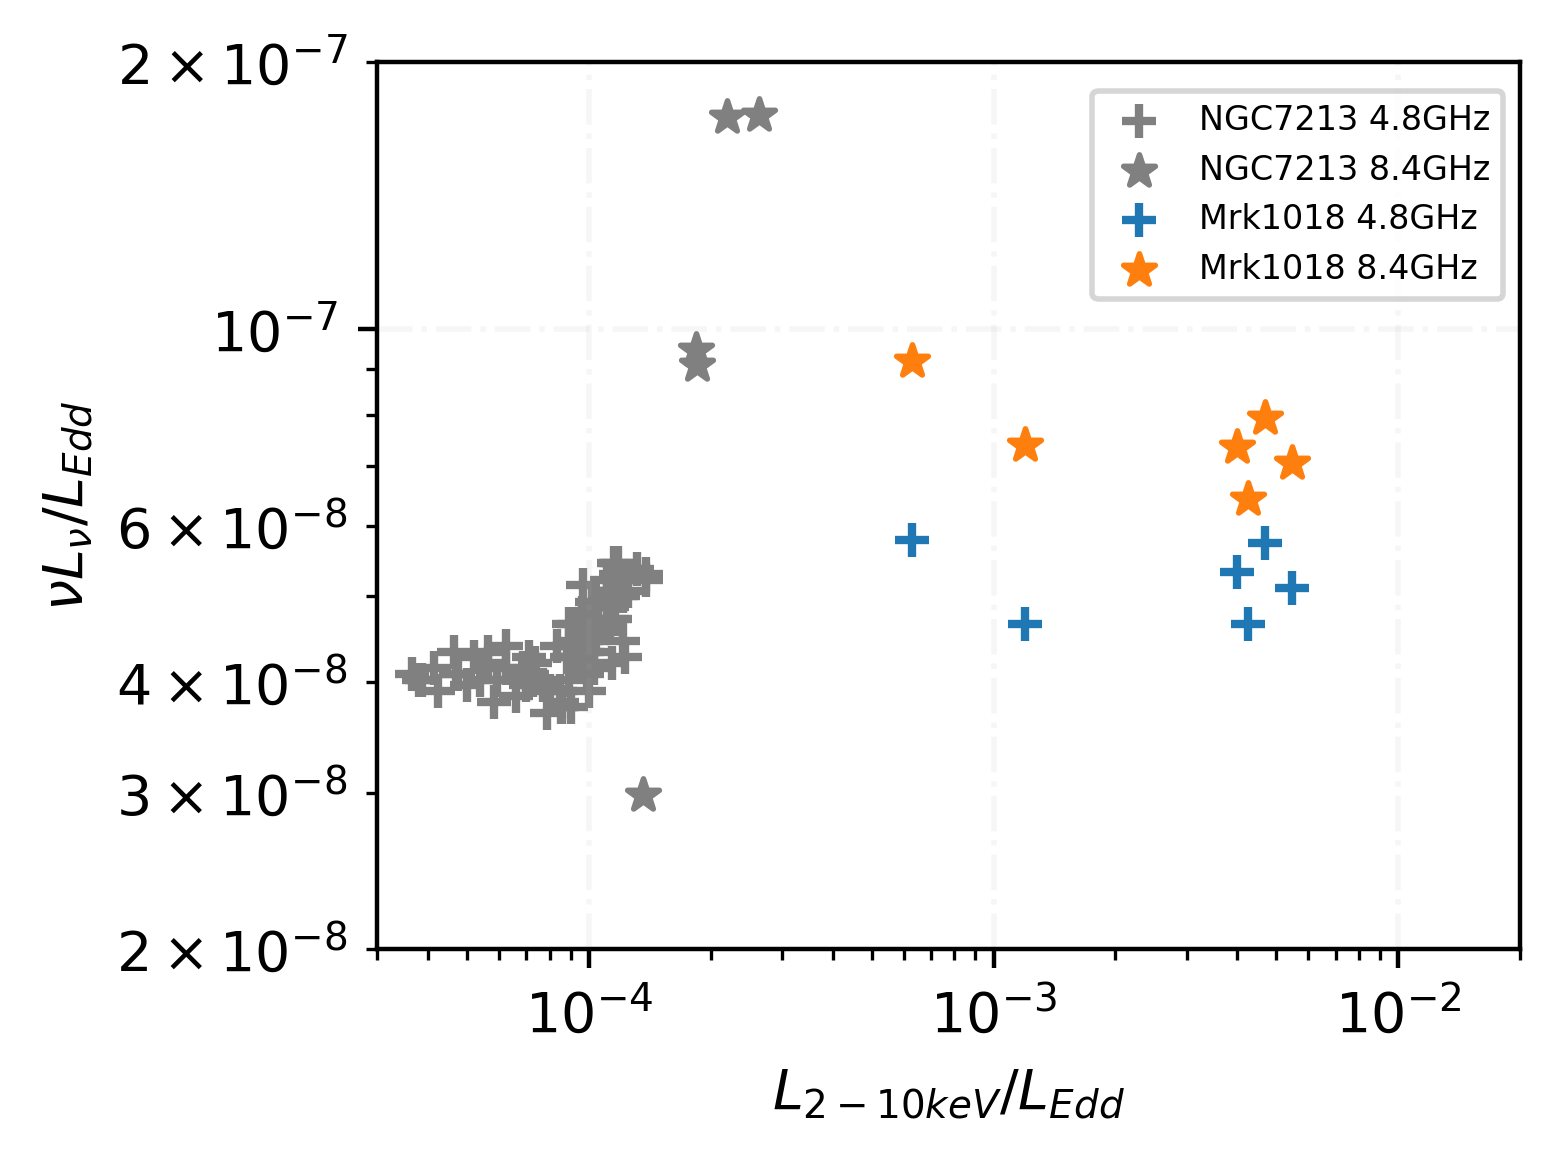

In [167]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter

from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.colors as colors


fontsize=16
fontsize_s=10

fig = plt.figure(figsize=(4,3),dpi=400)
ax = fig.add_subplot(111)



plt.scatter(10**NGC7213['LogLx']/Ledd_ngc7213,10**NGC7213['LogLr']/Ledd_ngc7213,color='grey',marker='+',label='NGC7213 4.8GHz')
plt.scatter(10**NGC7213_8['LogLx']/Ledd_ngc7213,10**NGC7213_8['LogLr']/Ledd_ngc7213,color='grey',marker='*',label='NGC7213 8.4GHz')



plt.scatter(radio_xray_sel1['Lx']/Ledd,radio_xray_sel1['LR4.8']/Ledd,marker='+',label='Mrk1018 4.8GHz')
plt.scatter(radio_xray_sel1['Lx']/Ledd,radio_xray_sel1['LR8.4']/Ledd,marker='*',label='Mrk1018 8.4GHz')

plt.semilogx()
plt.semilogy()
#plt.xlim(3e-4,3e-2)
#plt.ylim(5e-8,1.2e-7)
plt.xlim(3e-5,2e-2)
plt.ylim(2e-8,0.2e-6)



handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.85),ncol=1,fontsize=6,loc='right',frameon=True)    
#plt.legend()

plt.xlabel(r'$L_{2-10keV}/L_{Edd}$')
plt.ylabel(r'$\nu L_{\nu}/L_{Edd}$')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('Mrk1018_ngc7213_radio_xray_rate.png',dpi=400)   

In [285]:
x0 = np.linspace(0, 10, 11)
#plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)

In [290]:
x0.shape

(11,)

In [288]:
np.vander(x0, 2).shape

(11, 2)

In [292]:
np.vander(x0, 2)

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.]])

## linear plot with errorbar

In [293]:
def plot_with_errorbar(x,y,k,b,k_e,b_e)
    np.random.seed(1)
    x0=np.linspace(min(x),max(x),10)
    a= np.random.normal(k,k_e,100)
    b=  np.random.normal(b,b_e,100)
    plt.plot(x,y)
    for i,j in zip(a,b):
        plt.plot(x0, np.dot(np.vander(x0, 2), [i,j]), "C1", alpha=0.1)
        
        


In [ ]:

for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)

In [291]:
np.dot(np.vander(x0, 2),[0.5,2])

array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ])

In [ ]:
np.dot

## [Iterative fitting using sigma clipping](https://docs.astropy.org/en/stable/modeling/example-fitting-line.html#fit-using-uncertainties)

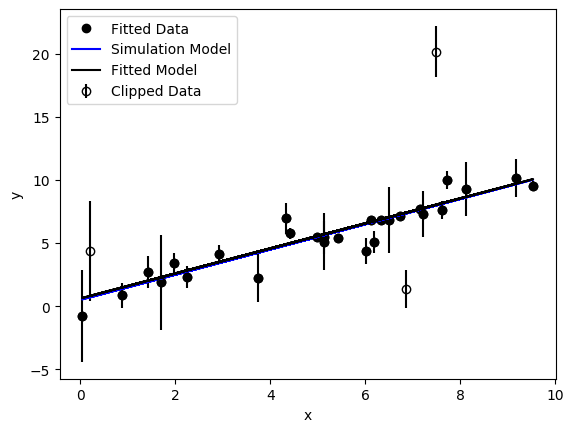

In [343]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting

# define a model for a line
line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# generate x, y data non-uniformly spaced in x
# add noise to y measurements
npts = 30
np.random.seed(10)
x = np.random.uniform(0.0, 10.0, npts)
y = line_orig(x)
yunc = np.absolute(np.random.normal(0.5, 2.5, npts))
y += np.random.normal(0.0, yunc, npts)

# make true outliers
y[3] = line_orig(x[3]) + 6 * yunc[3]
y[10] = line_orig(x[10]) - 4 * yunc[10]

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/yunc)
filtered_data = np.ma.masked_array(y, mask=mask)

# plot
plt.figure()
plt.errorbar(x, y, yerr=yunc, fmt="ko", fillstyle="none", label="Clipped Data")
plt.plot(x, filtered_data, "ko", label="Fitted Data")
plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(x, fitted_line(x), 'k-', label='Fitted Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## [emcee](https://emcee.readthedocs.io/en/stable/tutorials/line/)

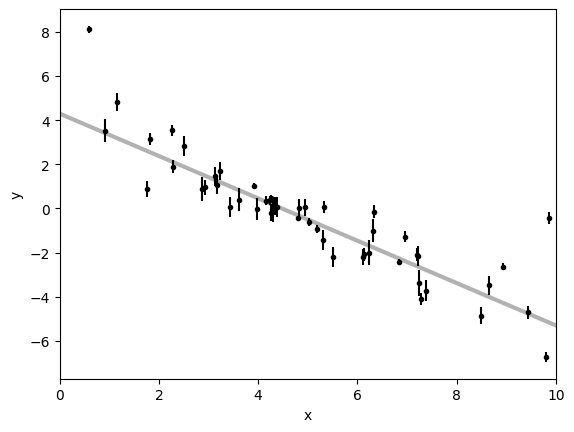

In [344]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [ ]:
instrument_label=['XMM-Newton','Chandra','NuSTAR','Swift','Suzaku']
